In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()


In [2]:
train_meta = pd.read_csv("train.csv")


In [3]:
train_meta.head()


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


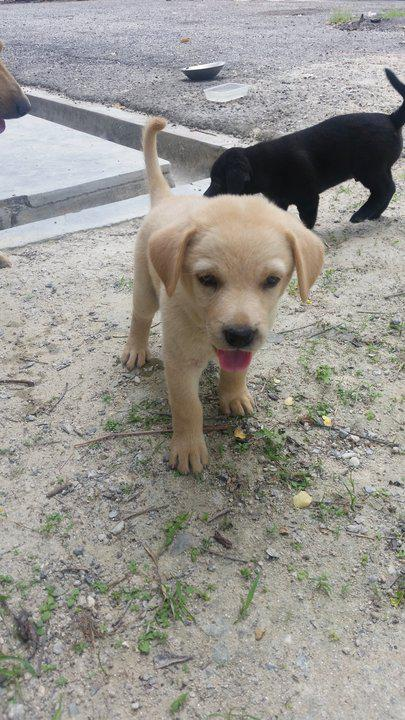

In [4]:
from IPython.display import display, Image

most_popular = ["./train/" + train_meta[["Id", "Pawpularity"]].sort_values(
    "Pawpularity", ascending=False)["Id"][i] + ".jpg" for i in range(1)]

for image in most_popular:
    display(Image(image))


<AxesSubplot:>

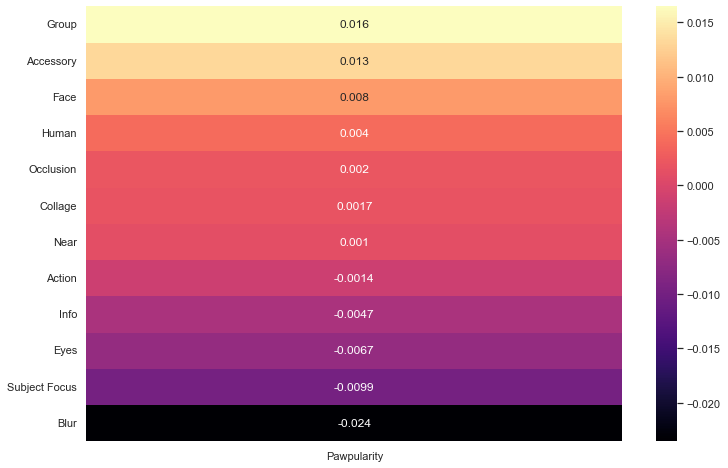

In [5]:
pawpularity_corr = train_meta \
    .drop("Id", axis=1) \
    .corr()[["Pawpularity"]] \
    .sort_values("Pawpularity", ascending=False) \
    .drop("Pawpularity")

plt.figure(figsize=(12, 8))
sns.heatmap(pawpularity_corr, annot=True, cmap="magma")


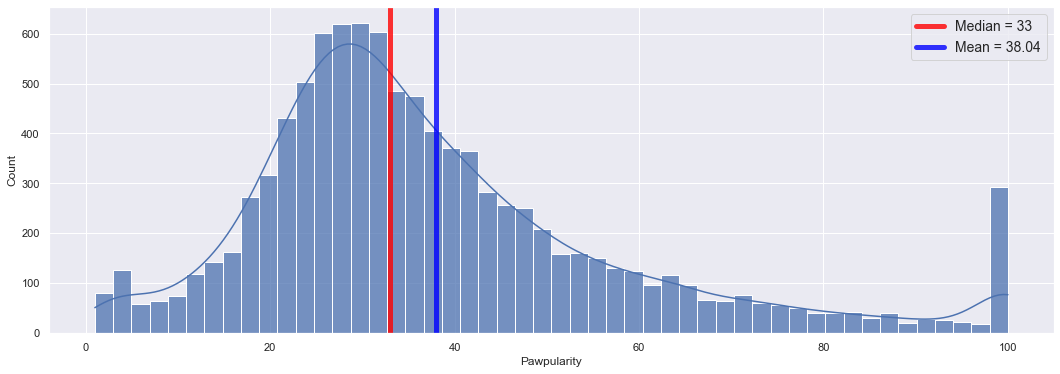

In [6]:
plt.figure(figsize=(18, 6))
sns.histplot(data=train_meta, x="Pawpularity", kde=True, bins=50, alpha=0.75)

plt.axvline(x=train_meta["Pawpularity"].median(), color="red", linewidth=5,
            alpha=0.8, label="Median = {:.0f}".format(train_meta["Pawpularity"].median()))
plt.axvline(x=train_meta["Pawpularity"].mean(), color="blue", linewidth=5,
            alpha=0.8, label="Mean = {:.2f}".format(train_meta["Pawpularity"].mean()))

plt.legend(loc="best", fontsize=14)


<AxesSubplot:xlabel='Pawpularity'>

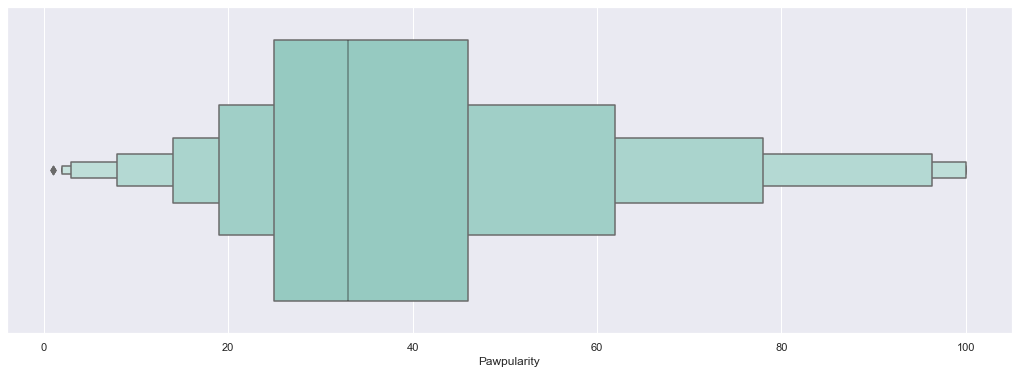

In [7]:
plt.figure(figsize=(18, 6))
sns.boxenplot(data=train_meta, x="Pawpularity", orient="h", palette="Set3")